<a href="https://colab.research.google.com/github/Melaka36/CodeZ/blob/main/XAI/20_Features_Model_Training(Without_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
df=pd.read_csv("drive/MyDrive/4th_Year_Research/Implementation/Dataset/Pre-Processed-Dataset.csv")
df.shape

(3630, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

# Drop All Academic Features

In [ ]:
newDF=df.drop(columns=['Curricular units 2nd sem (credited)',
                        'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)'], axis=1)
df=newDF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

# Splitting data into X and Y

In [ ]:
#will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data.
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [ ]:
X.shape

(3630, 21)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [ ]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64



---

# Splitting Data Into Training and Testing

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 21) (2904, 21) (726, 21)


# Model Training Without Scaling

# Linear Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter value
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

Accuracy: 0.756198347107438
Precision: 0.7411545623836127
Recall: 0.9128440366972477
F1-Score: 0.8180883864337102
ROC-AUC: 0.7167668459348308


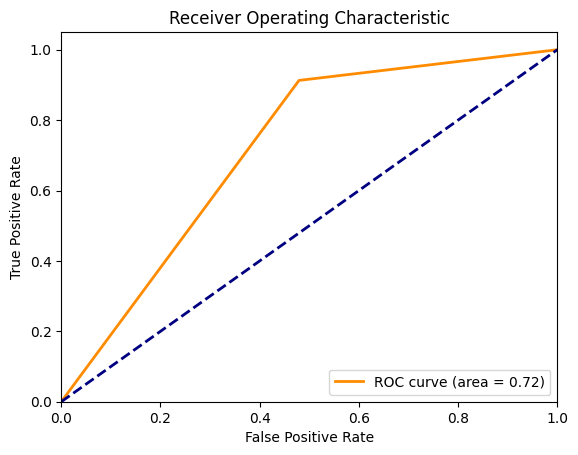

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[151 139]
 [ 38 398]]


<Axes: >

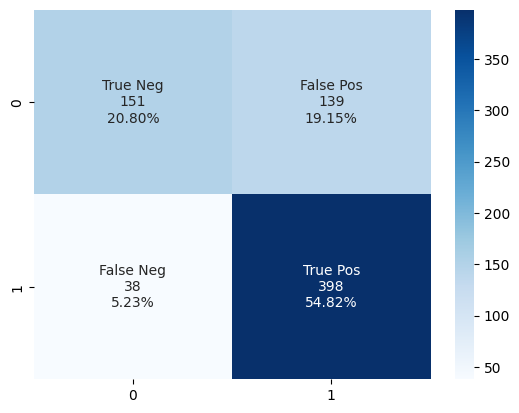

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.7589531680440771
Testing Accuracy: 0.756198347107438


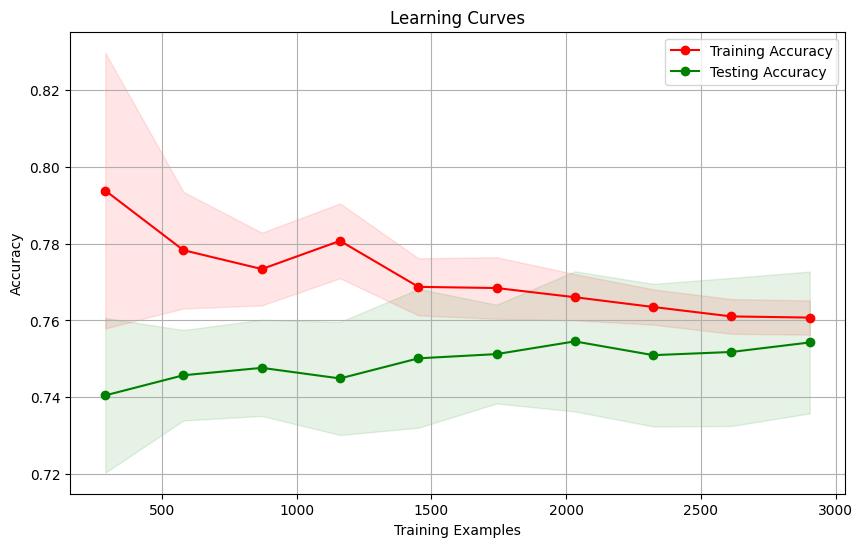

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.6942148760330579
Precision: 0.7316017316017316
Recall: 0.7752293577981652
F1-Score: 0.752783964365256
ROC-AUC: 0.6738215754508068


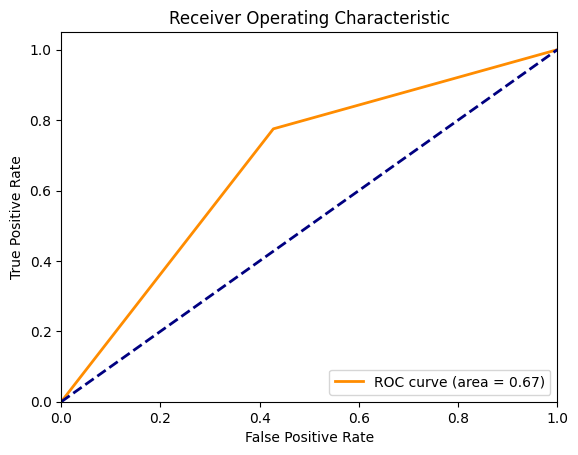

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[166 124]
 [ 98 338]]


<Axes: >

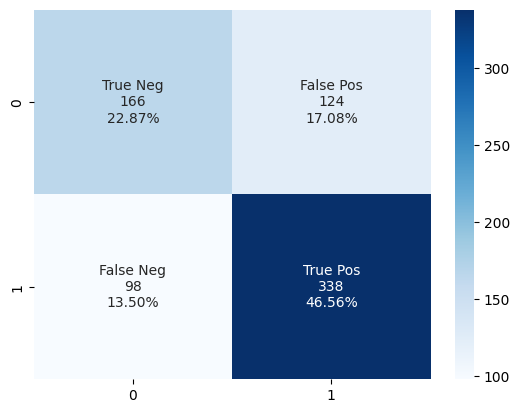

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

Accuracy: 0.7493112947658402
Precision: 0.7461240310077519
Recall: 0.8830275229357798
F1-Score: 0.8088235294117647
ROC-AUC: 0.7156516925023726


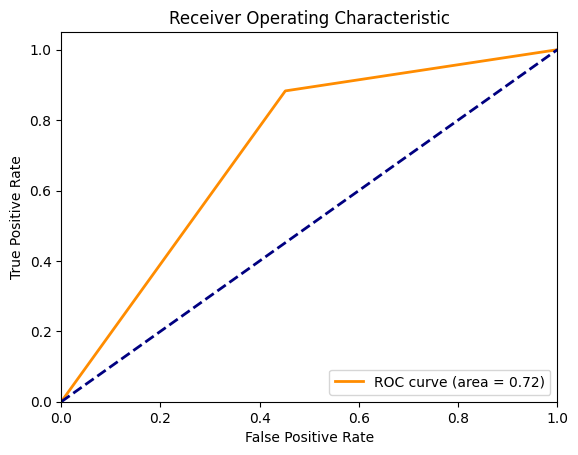

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[159 131]
 [ 51 385]]


<Axes: >

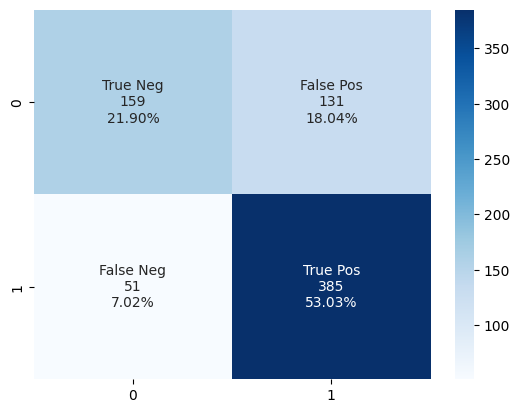

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# # Plot ROC Curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

Accuracy: 0.721763085399449
Precision: 0.720754716981132
Recall: 0.8761467889908257
F1-Score: 0.7908902691511387
ROC-AUC: 0.6829009807023093


In [ ]:
# conf_matrix = confusion_matrix(Y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

In [ ]:
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 conf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      conf_matrix.flatten()/np.sum(conf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.7231404958677686
Precision: 0.7272727272727273
Recall: 0.8623853211009175
F1-Score: 0.7890870933892971
ROC-AUC: 0.6880892122745967


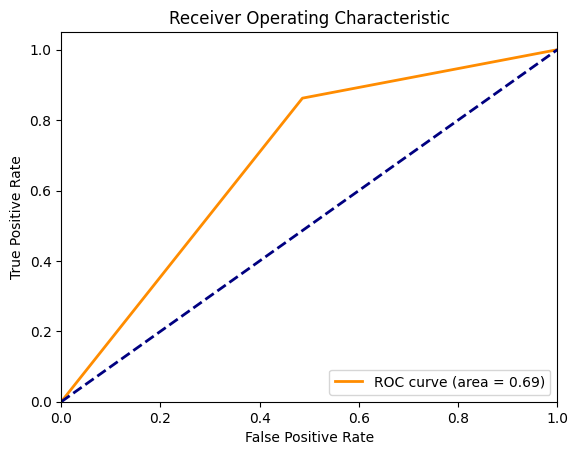

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[149 141]
 [ 60 376]]


<Axes: >

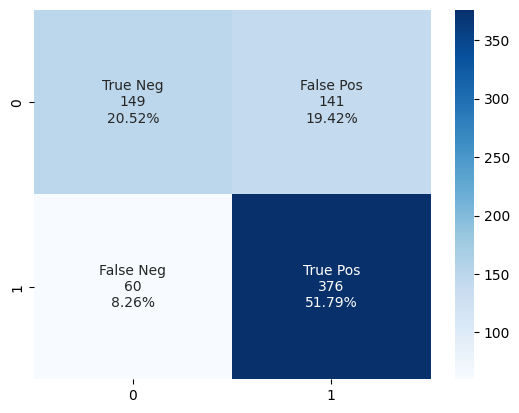

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# XGBoost

In [ ]:
bin_log = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000)
bin_log.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
target_prediction = bin_log.predict(X_test)
# print(target_prediction)

Accuracy: 0.7534435261707989
Precision: 0.7682672233820459
Recall: 0.8440366972477065
F1-Score: 0.8043715846994536
ROC-AUC: 0.7306390382790257


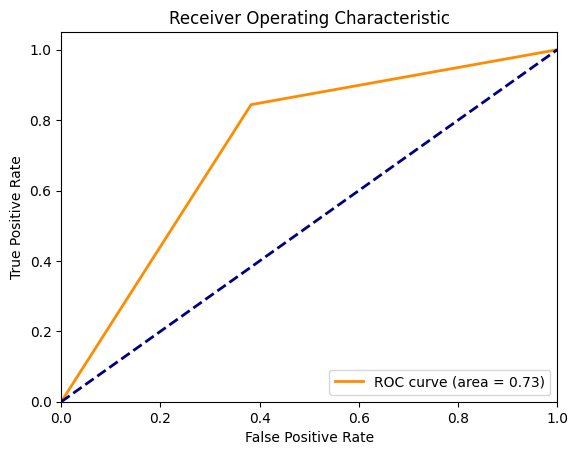

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, target_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[179 111]
 [ 68 368]]


<Axes: >

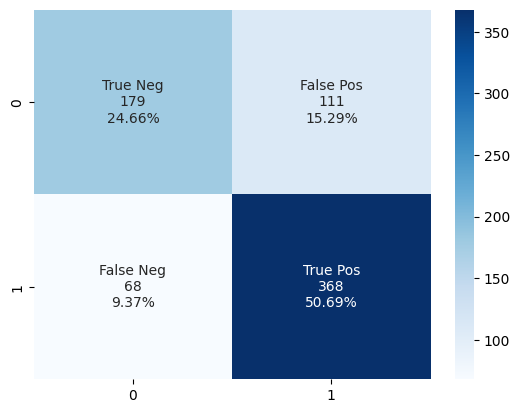

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Gradient Boost

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Create an XGBoost classifier
model = xgb.XGBClassifier(n_estimators=1000,  # Adjust the number of estimators (trees) as needed
                          max_depth=6,  # Adjust the maximum depth of trees as needed
                          learning_rate=0.01,  # Adjust the learning rate as needed
                          objective='binary:logistic',  # Use 'binary:logistic' for binary classification
                          random_state=42)  # Set a random seed for reproducibility

# Train the XGBoost model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7589531680440771
Precision: 0.757396449704142
Recall: 0.8807339449541285
F1-Score: 0.8144220572640509
ROC-AUC: 0.7282980069598228


In [ ]:
pip install catboost


# CatBoost

In [ ]:
from catboost import CatBoostClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

model = CatBoostClassifier(iterations=1000,  # Adjust the number of iterations as needed
                           depth=6,  # Adjust the depth of the trees as needed
                           learning_rate=0.1,  # Adjust the learning rate as needed
                           loss_function='Logloss',  # Use 'Logloss' for binary classification
                           random_seed=42)  # Set a random seed for reproducibility

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)


0:	learn: 0.6461442	total: 4.86ms	remaining: 4.86s
1:	learn: 0.6089494	total: 7.4ms	remaining: 3.69s
2:	learn: 0.5847869	total: 9.37ms	remaining: 3.11s
3:	learn: 0.5615259	total: 11.3ms	remaining: 2.82s
4:	learn: 0.5454592	total: 13ms	remaining: 2.6s
5:	learn: 0.5307711	total: 14.7ms	remaining: 2.44s
6:	learn: 0.5180496	total: 16.6ms	remaining: 2.36s
7:	learn: 0.5076204	total: 20.9ms	remaining: 2.59s
8:	learn: 0.5006428	total: 23.2ms	remaining: 2.56s
9:	learn: 0.4927967	total: 26.2ms	remaining: 2.6s
10:	learn: 0.4853558	total: 29ms	remaining: 2.61s
11:	learn: 0.4822055	total: 31.9ms	remaining: 2.62s
12:	learn: 0.4759711	total: 34.3ms	remaining: 2.6s
13:	learn: 0.4720329	total: 37.1ms	remaining: 2.61s
14:	learn: 0.4679057	total: 40.1ms	remaining: 2.63s
15:	learn: 0.4641877	total: 41.8ms	remaining: 2.57s
16:	learn: 0.4614267	total: 43.5ms	remaining: 2.52s
17:	learn: 0.4598182	total: 45.2ms	remaining: 2.47s
18:	learn: 0.4566398	total: 47ms	remaining: 2.43s
19:	learn: 0.4526489	total: 48.8

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

Accuracy: 0.756198347107438
Precision: 0.7626774847870182
Recall: 0.8623853211009175
F1-Score: 0.8094725511302475
ROC-AUC: 0.7294685226194242


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100,  # Adjust the number of estimators (trees) as needed
                  learning_rate=1.0)  # Adjust the learning rate as needed

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7644628099173554
Precision: 0.7592954990215264
Recall: 0.8899082568807339
F1-Score: 0.8194297782470961
ROC-AUC: 0.7328851629231254
